In [1]:
import pandas as pd

df = pd.read_csv("시계열df.csv", encoding="euc-kr")
df.head(3)

,date,호기,total,mean,max,min,최대(시간별),최소(시간별),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2020-01-01,1.0,80366.0,3349.0,7008.0,402.0,7008.0,402.0,4295.0,2736.0,...,7008.0,6577.0,6574.0,3883.0,1388.0,2499.0,2262.0,1149.0,912.0,402.0
1,2020-01-02,1.0,36577.0,1524.0,3889.0,73.0,3889.0,73.0,680.0,73.0,...,2253.0,2206.0,3346.0,3889.0,2313.0,2102.0,1620.0,1351.0,1583.0,2226.0
2,2020-01-03,1.0,52112.0,2171.0,4856.0,277.0,4856.0,277.0,1753.0,668.0,...,4442.0,3167.0,4856.0,4579.0,3094.0,3645.0,3150.0,2885.0,1668.0,4268.0


In [2]:
df = df[['date', 'mean']]
df.head(3)

,date,mean
0,2020-01-01,3349.0
1,2020-01-02,1524.0
2,2020-01-03,2171.0


In [3]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

monthly_mean = df.groupby(df['date'].dt.to_period("M")).mean()

monthly_mean_unique = monthly_mean[~monthly_mean.index.duplicated(keep='first')]

df = monthly_mean_unique
df = df.drop('date', axis=1)
df

,mean
date,
2020-01,3616.580645
2020-02,3173.862069
2020-03,3417.096774
2020-04,3687.566667
2020-05,2124.290323
2020-06,1286.266667
2020-07,1702.870968
2020-08,2746.290323
2020-09,1356.800000


In [4]:
df.loc['2022-12', 'mean'] = 3476.71
df

,mean
date,
2020-01,3616.580645
2020-02,3173.862069
2020-03,3417.096774
2020-04,3687.566667
2020-05,2124.290323
2020-06,1286.266667
2020-07,1702.870968
2020-08,2746.290323
2020-09,1356.800000


In [5]:
df = df.reset_index('date')
df = df[['date', 'mean']]
df

,date,mean
0,2020-01,3616.580645
1,2020-02,3173.862069
2,2020-03,3417.096774
3,2020-04,3687.566667
4,2020-05,2124.290323
5,2020-06,1286.266667
6,2020-07,1702.870968
7,2020-08,2746.290323
8,2020-09,1356.800000
9,2020-10,2635.161290


In [6]:
df['date'] = df['date'].astype(str)

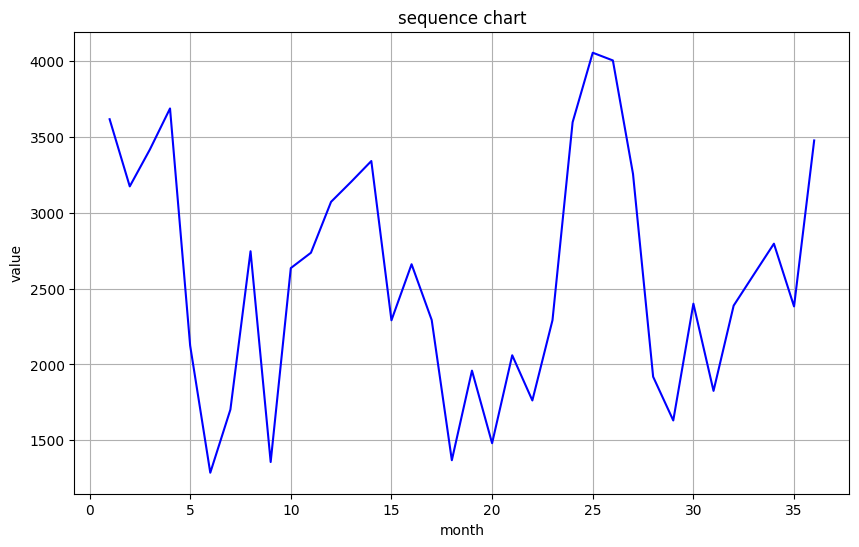

In [7]:
df['sequence'] = range(1, len(df) + 1)

plt.figure(figsize=(10, 6))
plt.plot(df['sequence'], df['mean'], linestyle='-', color='b')
plt.title('sequence chart')
plt.xlabel('month')
plt.ylabel('value')
plt.grid(True)
plt.show()

C:\Users\co279\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


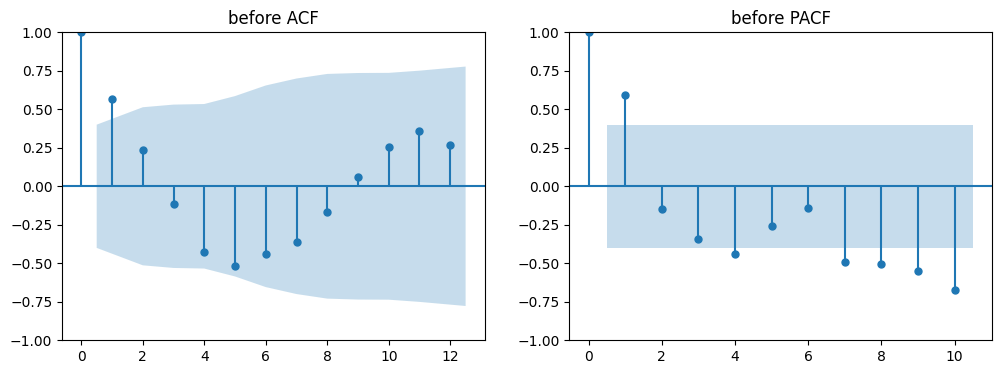

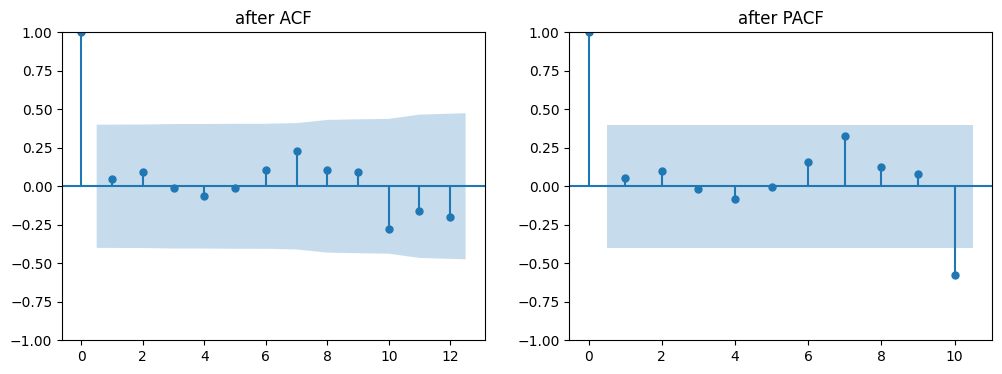

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['seasonal_diff'] = df['mean'].diff(12)

# 결측치 제거
df = df.dropna()

# ACF 및 PACF 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 계절 차분 적용 전 ACF 및 PACF
plot_acf(df['mean'], ax=ax1, lags=12, title='before ACF')
plot_pacf(df['mean'], ax=ax2, lags=10, title='before PACF')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 계절 차분 적용 후 ACF 및 PACF
plot_acf(df['seasonal_diff'], ax=ax1, lags=12, title='after ACF')
plot_pacf(df['seasonal_diff'], ax=ax2, lags=10, title='after PACF')

plt.show()

In [9]:
order = (0,1,1)
seasonal_order = (1,1,0,12)
sarima_model = sm.tsa.SARIMAX(df['mean'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

print(sarima_result.summary())

C:\Users\co279\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\co279\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\co279\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                      
Dep. Variable:                                mean   No. Observations:                   24
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -87.327
Date:                             Tue, 19 Dec 2023   AIC                            180.654
Time:                                     15:34:15   BIC                            181.848
Sample:                                          0   HQIC                           179.902
                                              - 24                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6372      0.318     -2.001      0.045      -1.261      -0.013
ar.S.L12      -0.9972      

C:\Users\co279\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


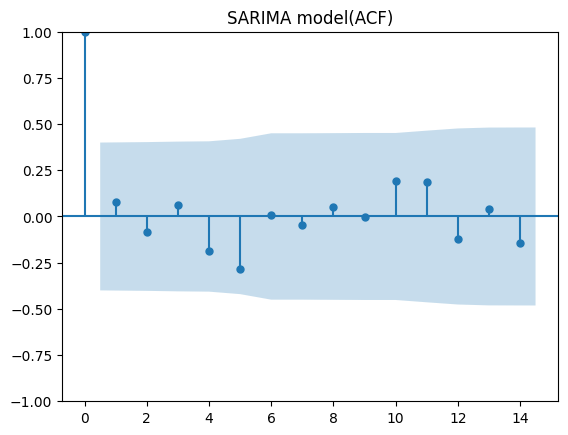

In [10]:
residuals = sarima_result.resid
plot_acf(residuals)
plt.title('SARIMA model(ACF)')
plt.show()

C:\Users\co279\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


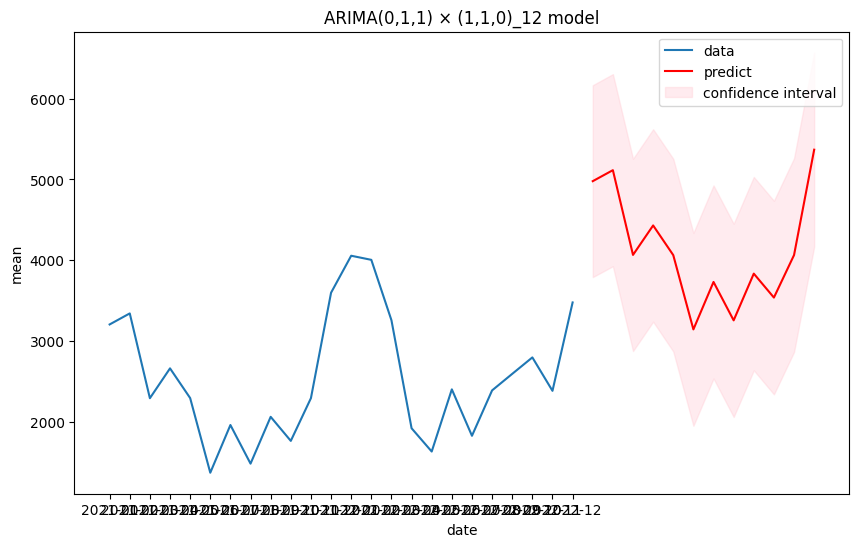

In [15]:
forecast_steps = 12  # 1년에 해당하는 데이터 포인트 수
forecast = sarima_result.get_forecast(steps=forecast_steps)

# 예측 결과의 신뢰구간 구하기
forecast_ci = forecast.conf_int()

# 원래 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))

# 원래 데이터
plt.plot(df['date'], df['mean'], label='data')

# 예측 결과
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='predict')

# 신뢰구간
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='confidence interval')

plt.title('ARIMA(0,1,1) × (1,1,0)_12 model')
plt.xlabel('date')
plt.ylabel('mean')
plt.legend()
plt.show()